<a href="https://colab.research.google.com/github/TingLin-Hsiao/special-octo-spork/blob/main/%E6%88%91%E7%9A%84%E6%95%B8%E5%AD%97%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 沒有前處理

In [ ]:
#載入dataset
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

#建模型
model = models.Sequential(
    [
     layers.Flatten(),                #壓成一維
     layers.Dense(units=256,activation="sigmoid"),  #hidden layer
     layers.Dense(units=10,activation="softmax"),   #output layer,因為分成10類所以是10
    ]
)

#設定HyperParameters
model.compile(loss="sparse_categorical_crossentropy",  #選擇loss function, 因為要分類 分成0~9, 因此選"sparse_categorical_crossentropy" 
      optimizer="adam",              #選擇優化器
      metrics=["accuracy"])

#開始training
history=model.fit(
    x=X_train,
    y=y_train,
    epochs=50,      #train 50次
    verbose=1,
    validation_split=0.1 #取10%訓練資料為驗證資料
)
model.summary()

Epoch 1/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.4735 - accuracy: 0.8706 - val_loss: 0.3041 - val_accuracy: 0.9232
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3256 - accuracy: 0.9061 - val_loss: 0.2654 - val_accuracy: 0.9272
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2991 - accuracy: 0.9126 - val_loss: 0.2278 - val_accuracy: 0.9362
Epoch 4/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2791 - accuracy: 0.9174 - val_loss: 0.2194 - val_accuracy: 0.9345
Epoch 5/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2678 - accuracy: 0.9201 - val_loss: 0.2124 - val_accuracy: 0.9392
Epoch 6/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2543 - accuracy: 0.9236 - val_loss: 0.2102 - val_accuracy: 0.9365
Epoch 7/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2457 - accuracy: 0.9267 - val_loss: 0.2057 - val_accuracy

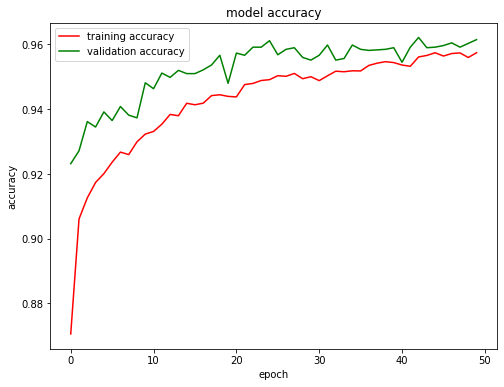

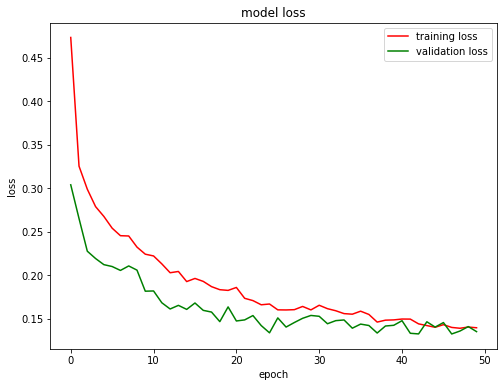

In [ ]:
import matplotlib.pyplot as plt
#畫accuracy的圖
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], 'r', label='training accuracy')    #紅色的線 training accuracy
plt.plot(history.history['val_accuracy'], 'g', label='validation accuracy') #綠色的線 validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend() 
plt.show()

#畫loss的圖
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], 'r', label='training loss')      #紅色的線 training loss     
plt.plot(history.history['val_loss'], 'g', label='validation loss')   #綠色的線 validation loss
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() 
plt.show()


In [ ]:
#開始testing
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("test loss"+str(test_loss))
print("test accuracy"+str(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9546
test loss0.1465558409690857
test accuracy0.9545999765396118


# 有前處理

In [ ]:
#載入dataset
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

#前處理 標準化
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255            #灰階有0~255
X_test /=255

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

#建模型
model = models.Sequential(
    [
     layers.Flatten(),                #壓成一維
     layers.Dense(units=256,activation="sigmoid"),  #hidden layer
     layers.Dense(units=10,activation="softmax"),   #output layer,因為分成10類所以是10
    ]
)

#設定HyperParameters
model.compile(loss="sparse_categorical_crossentropy",  #選擇loss function, 因為要分類 分成0~9, 因此選"sparse_categorical_crossentropy" 
      optimizer="adam",              #選擇優化器
      metrics=["accuracy"])

#開始training
history=model.fit(
    x=X_train,
    y=y_train,
    epochs=50,      #train 50次
    verbose=1,
    validation_split=0.1 #取10%訓練資料為驗證資料
)
model.summary()

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8967 - val_loss: 0.1794 - val_accuracy: 0.9515
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1917 - accuracy: 0.9444 - val_loss: 0.1315 - val_accuracy: 0.9638
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1354 - accuracy: 0.9605 - val_loss: 0.1081 - val_accuracy: 0.9700
Epoch 4/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1002 - accuracy: 0.9705 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 5/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0769 - accuracy: 0.9777 - val_loss: 0.0842 - val_accuracy: 0.9730
Epoch 6/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0599 - accuracy: 0.9829 - val_loss: 0.0740 - val_accuracy: 0.9772
Epoch 7/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9869 - val_loss: 0.0699 - val_accuracy:

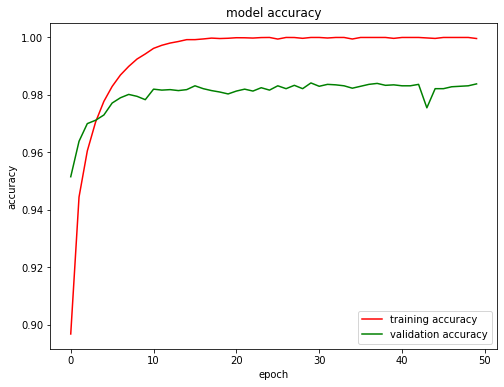

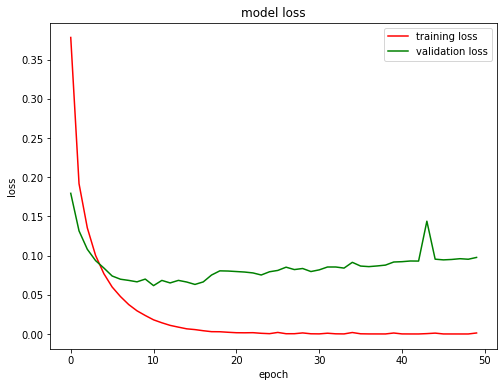

In [ ]:
import matplotlib.pyplot as plt
#畫accuracy的圖
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], 'r', label='training accuracy')    #紅色的線 training accuracy
plt.plot(history.history['val_accuracy'], 'g', label='validation accuracy') #綠色的線 validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend() 
plt.show()

#畫loss的圖
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], 'r', label='training loss')      #紅色的線 training loss     
plt.plot(history.history['val_loss'], 'g', label='validation loss')   #綠色的線 validation loss
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() 
plt.show()

In [ ]:
#開始testing
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("test loss"+str(test_loss))
print("test accuracy"+str(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1089 - accuracy: 0.9806
test loss0.10886398702859879
test accuracy0.9805999994277954
